<a href="https://colab.research.google.com/github/CarlosContrerasVilla/IA-y-RN/blob/main/2RED_NEURONAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de la clase Inteligencia Artificial y Redes Neuronales**

Este  proyecto consiste en el entrenamiento de una red neuronal artificial con la ayuda del dataset MNIST.





**Carlos Hiram Contreras Villarreal 1965687 **

In [13]:
#importar librerias
import os
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras

In [14]:
# Guardar las imagenes y etiquetas de entrenamiento y prueba
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [15]:
class_names= ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

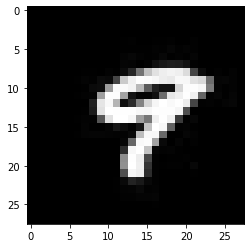

In [16]:
#para test van ser 20 imagenes
i=0
f=0
image_test=[]
label_test=[]

while(i<100):
  file = '/content/'+str(i)+'.png'

  test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE )

  
  img_resized= cv2.resize(test_image,(28,28),)

  img_resized=cv2.bitwise_not(img_resized)

  #Preview de la imagen reformateada
  numeros='/content/'+str(i)+'.png'
  plt.imshow(img_resized,cmap='gray')
  if(f==9):
    image_test.append(img_resized)#aqui se guarda la imagen convertida
    label_test.append(f)#etiqueta del 0-9
    
    f=0
  else:
    
    image_test.append(img_resized)#aqui se guarda la imagen convertida
    label_test.append(f)#etiqueta del 0-9
    f=f+1

  i=i+1
  new_image_test=np.array(image_test)
  new_labels_test=np.array(label_test)


In [17]:
mnist=keras.datasets.mnist

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [19]:
train_images = train_images / 255.0

test_images = test_images / 255.0

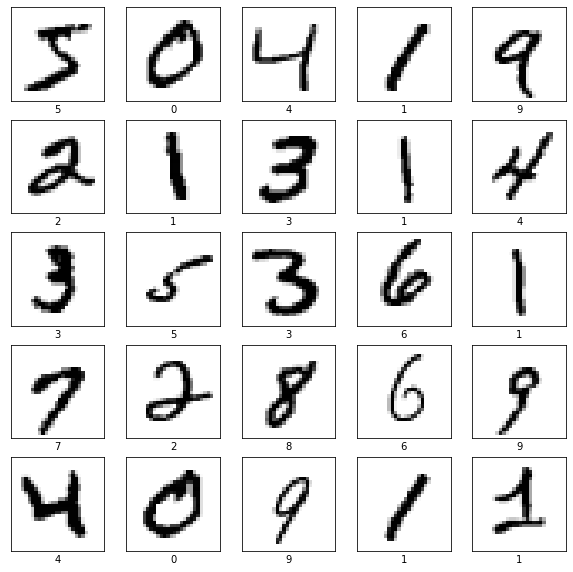

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Configurar los layers

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=10 )

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2611 - accuracy: 0.9259
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1132 - accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0785 - accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0589 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0454 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0350 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0281 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0225 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0198 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.015

# Exatitud del modelo

In [23]:
test_loss, test_acc = model.evaluate(new_image_test,  new_labels_test, verbose=2)

print('\nTest accuracy:', test_acc)

4/4 - 0s - loss: 955.0344 - accuracy: 0.3800 - 176ms/epoch - 44ms/step

Test accuracy: 0.3799999952316284


# Predicciones de las imagenes

In [24]:
predictions = model.predict(new_image_test)

4/4 [==============================] - 0s 3ms/step


In [25]:
np.argmax(predictions[0])

6

In [27]:
new_labels_test[0]

0

**Graficando esto para poder ver todo el set de la prediccion de las 10 clases.**

In [28]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

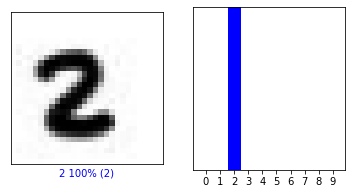

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], new_labels_test, new_image_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  new_labels_test)
plt.show()

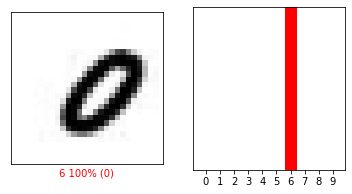

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], new_labels_test, new_image_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  new_labels_test)
plt.show()

 **Vamos a graficar multiples imagenes con 
sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.**

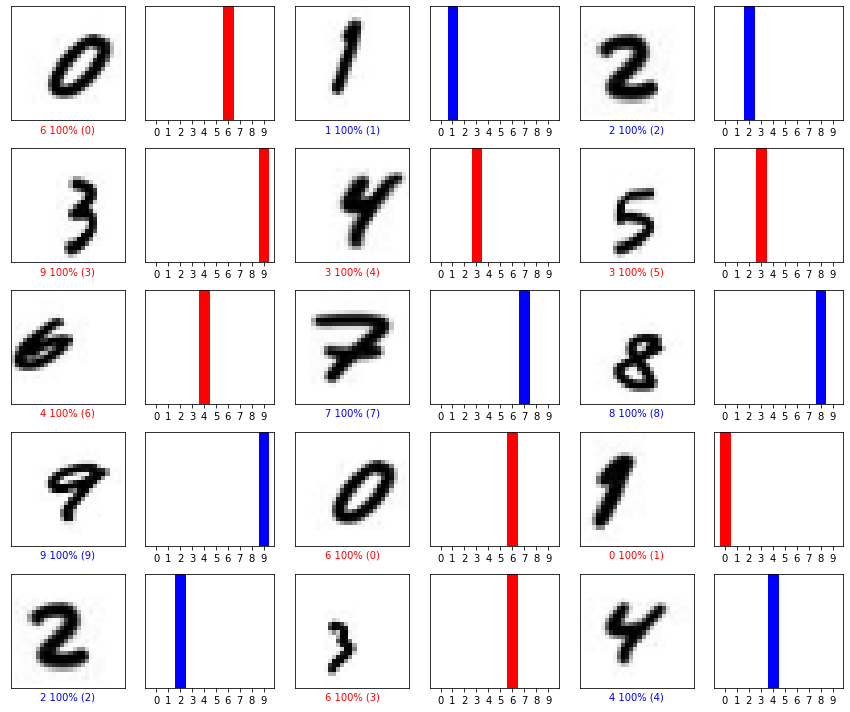

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], new_labels_test, new_image_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], new_labels_test)
plt.tight_layout()
plt.show()

**usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.**

In [34]:
# Grab an image from the test dataset.
img = new_image_test[1]

print(img.shape)

(28, 28)


In [35]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [36]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


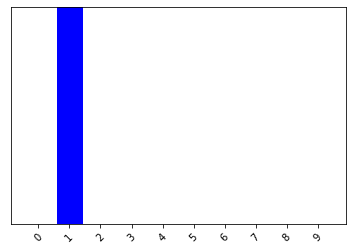

In [38]:
plot_value_array(1, predictions_single[0], new_labels_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [39]:
np.argmax(predictions_single[0])

1